# Gradient decent logistic regression
## Mateusz Baran
### 155620

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import colorConverter, ListedColormap
import seaborn as sns

In [58]:
sns.set_style('darkgrid')
np.random.seed(seed=1)

## Define the class distributions

In [59]:
# define and generathe the samples
nb_of_saples_per_class = 20 # the number of sample in each class
red_mean = (-1., 0.) # the mean of the red class
blue_mean = (1., 0.) # the mean of the blue class

# generate samples from both classes
x_red = np.random.randn(nb_of_saples_per_class, 2) + red_mean
x_blue = np.random.randn(nb_of_saples_per_class, 2) + blue_mean

# merge samples in set of input variables x and corresponding
# set of output variables t
X = np.vstack((x_red, x_blue))
t = np.vstack((np.zeros((nb_of_saples_per_class, 1)), np.ones((nb_of_saples_per_class, 1))))

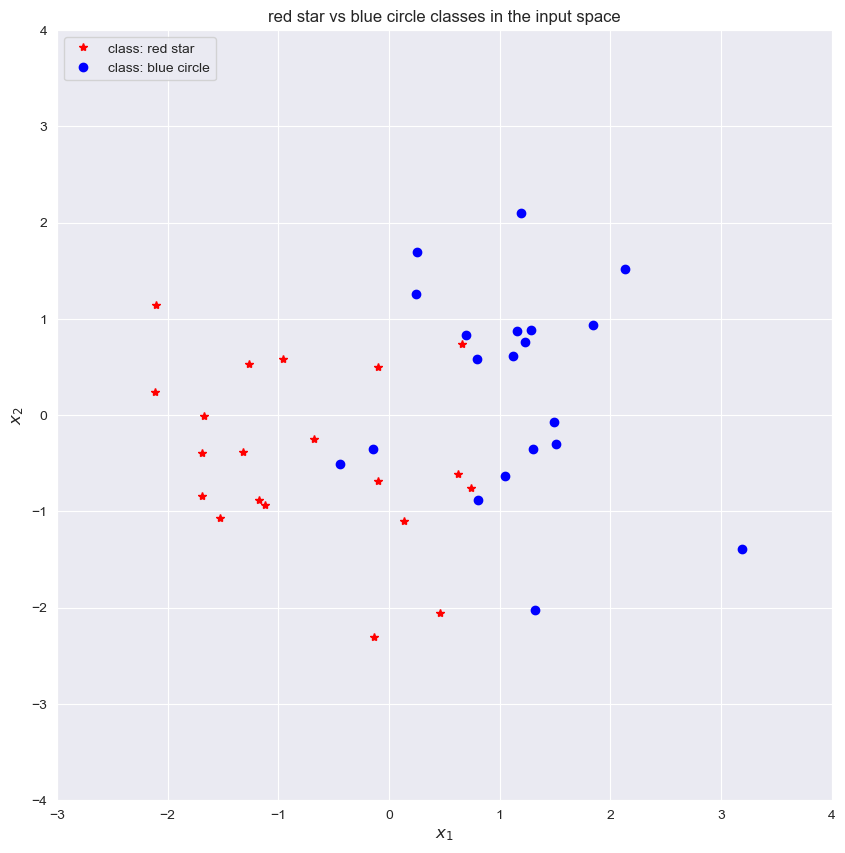

In [60]:
# plot both classes

plt.figure(figsize=(10,10))
plt.plot(x_red[:, 0], x_red[: ,1], 'r*', label='class: red star')
plt.plot(x_blue[:, 0], x_blue[: ,1], 'bo', label='class: blue circle')
plt.legend(loc=2)
plt.xlabel('$x_1$', fontsize=12)
plt.ylabel('$x_2$', fontsize=12)
plt.axis([-3, 4, -4, 4])
plt.title('red star vs blue circle classes in the input space')
plt.show()

In [61]:
# define the logistic function
def logistic(z):
    return 1. / (1 + np.exp(-z))

# define the neural network function y = 1 / (1 + numpy.exp(-x*w)
def nn(x, w):
    return logistic(x.dot(w.T))

# define the neutral network prediction function that only returns
# 1 or 0 depending on the predicted class

def nn_predict(x, w):
    return np.around(nn(x, w))

# define the loss function
def loss(y, t):
    return - np.mean(np.multiply(t, np.log(y)) + np.multiply((1 - t), np.log(1 - y)))

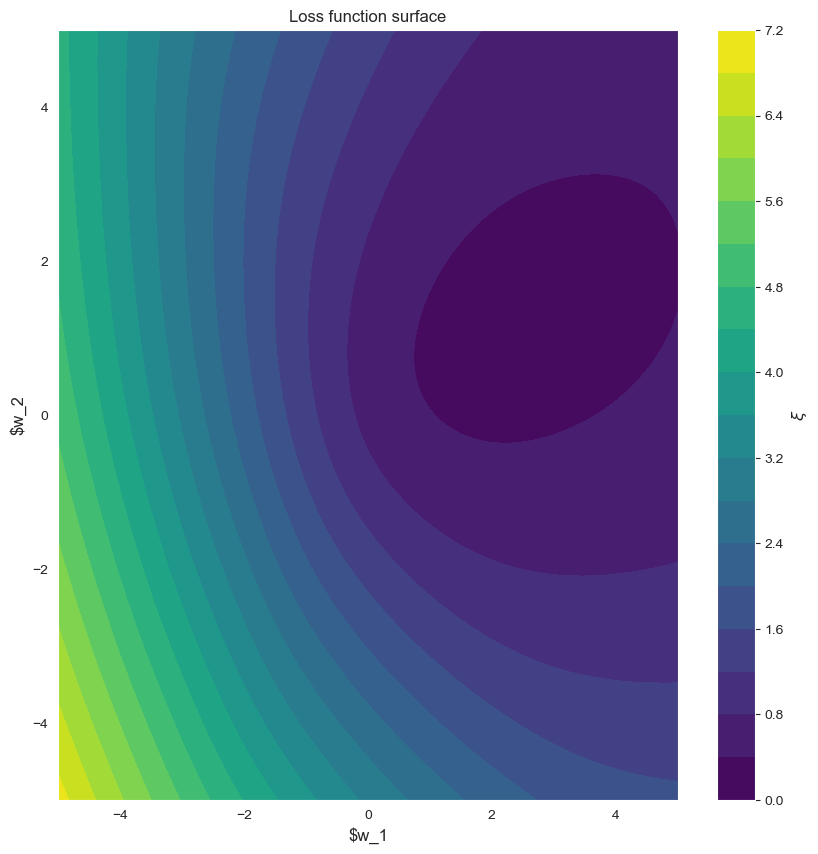

In [62]:
# plot the loss in function of the weights
# define a vector of weights for which we want to plot the loss

nb_of_ws = 100 # compute the loss nb_of_ws times in each dimension
wsa = np.linspace(-5, 5, num=nb_of_ws) # weight a
wsb = np.linspace(-5, 5, num=nb_of_ws) # weight b
ws_x, ws_y = np.meshgrid(wsa, wsb) # generate grid
loss_ws = np.zeros((nb_of_ws, nb_of_ws)) # initialize loss matrix

# fill the loss matrix for each combination of weights
for i in range(nb_of_ws):
    for j in range(nb_of_ws):
        loss_ws[i, j] = loss(
            nn(X, np.asmatrix([ws_x[i, j], ws_y[i, j]])), t
        )
# plot the loss function surface
plt.figure(figsize=(10,10))
plt.contourf(ws_x, ws_y, loss_ws, 20, cmap=cm.viridis)
cbar = plt.colorbar()
cbar.ax.set_ylabel('$\\xi$', fontsize=12)
plt.xlabel('$w_1', fontsize=12)
plt.ylabel('$w_2', fontsize=12)
plt.title('Loss function surface')
plt.grid()
plt.show()

In [63]:
def gradient(w, x, t):
    """Gradient function."""
    return (nn(x, w) - t).T * x

def delta_w(w_k, x, t, learning_rate):
    """
    Update function which returns the update for each weight
    {w_a, w_b} in a vector
    """
    return learning_rate * gradient(w_k, x, t)

### Gradient descent updates

In [64]:
# set the initial weight parameter
w = np.asmatrix([-4, -2])  # randomly decided
# set the learning rate
learning_rate = 0.05

# start the gradient descent updates and plot the iterations
nb_of_iterations = 10 # number of gradient descent updates
w_iter = [w] # list to store the weight values over the iterations
for i in range(nb_of_iterations):
    dw = delta_w(w, X, t, learning_rate) # get the delta w update
    w = w - dw # update the weights
    w_iter.append(w) # store the weights for plotting

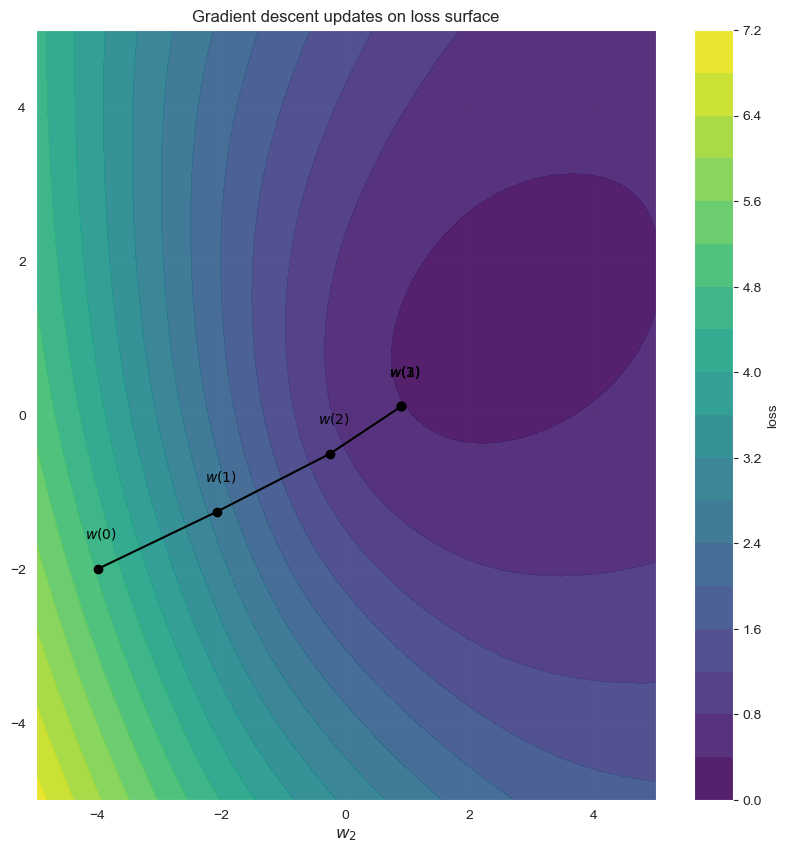

In [65]:
# plot the first weight updates on the eror surface
# plot the error surface
plt.figure(figsize=(10, 10))
plt.contourf(ws_x, ws_y, loss_ws, 20, alpha=0.9, cmap=cm.viridis)
cbar = plt.colorbar()
cbar.ax.set_ylabel('loss')

# plot the updates
for i in range(1, 4):
    w1 = w_iter[i-1]
    w2 = w_iter[i]
    # plot thje weight-loss values that represents the update
    plt.plot(w1[0,0], w1[0,1], 'ko') # plot the weight-loss value
    plt.plot([w1[0,0], w2[0,0]], [w1[0,1], w2[0,1]], 'k-')
    plt.text(w1[0,0]-0.2, w1[0,1]+0.4, f'$w({i-1})$', color='k')

    # plot the last weight
    w1 = w_iter[3]
    plt.plot(w1[0,0], w1[0,1], 'ko')
    plt.text(w1[0,0]-0.2, w1[0,1]+0.4, f'$w({i})$', color='k')
# show figure
plt.xlabel('$w_1$', fontsize=12)
plt.xlabel('$w_2$', fontsize=12)
plt.title('Gradient descent updates on loss surface')
plt.show()

### Visualization of the trained classifier

/var/folders/jt/tty5vz7x055ff2wqz3c5z_mc0000gn/T/ipykernel_2669/1453038283.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  classification_plane[i,j] = nn_predict(


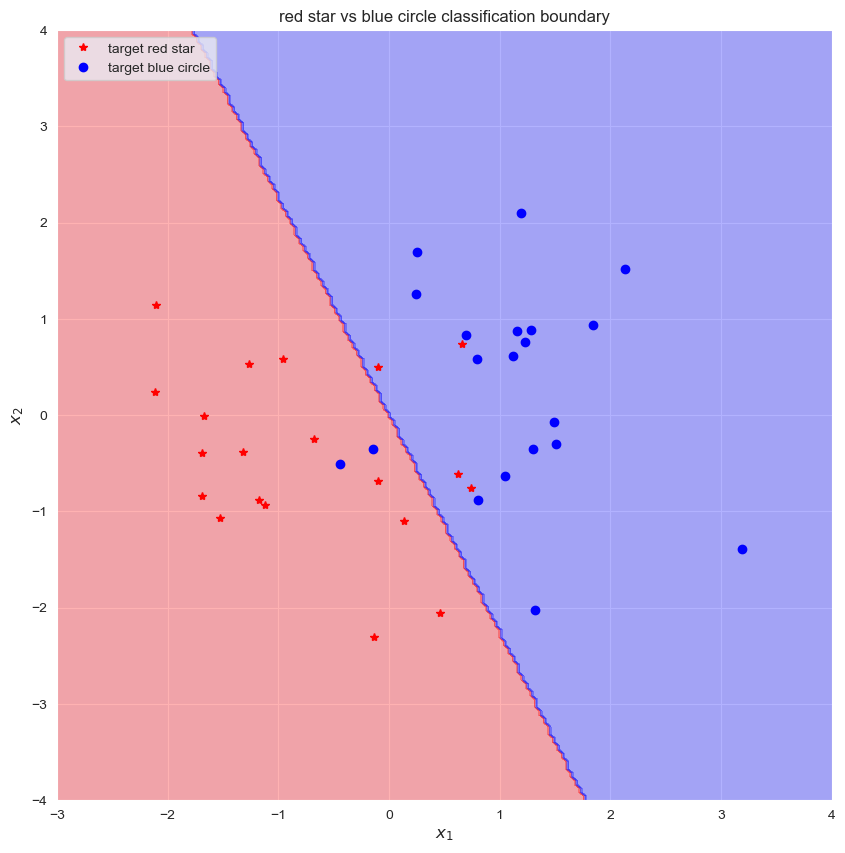

In [66]:
# plot the resulting decision boundary
plt.figure(figsize=(10,10))
# generate a grid over the input space to plot the color of the
# classification at that grid point
nb_of_xs = 200
xsa = np.linspace(-4, 4, num=nb_of_xs)
xsb = np.linspace(-4, 4, num=nb_of_xs)
xx, yy = np.meshgrid(xsa, xsb) # generate the grid
# initialize and fill the classification plane
classification_plane = np.zeros((nb_of_xs, nb_of_xs))

for i in range(nb_of_xs):
    for j in range(nb_of_xs):
        classification_plane[i,j] = nn_predict(
            np.asmatrix([xx[i,j], yy[i,j]]), w
        )
# create o color map to show the classification space
cmap = ListedColormap([
        colorConverter.to_rgba('r', alpha=0.3),
        colorConverter.to_rgba('b', alpha=0.3),
    ])

# plot the classification plane with decision boundary and input samples
plt.contourf(xx, yy, classification_plane, cmap=cmap)
plt.plot(x_red[:,0], x_red[:,1], 'r*', label='target red star')
plt.plot(x_blue[:,0], x_blue[:,1], 'bo', label='target blue circle')
plt.legend(loc=2)
plt.xlabel('$x_1$', fontsize=12)
plt.ylabel('$x_2$', fontsize=12)
plt.title('red star vs blue circle classification boundary')
plt.axis([-3, 4, -4, 4])
plt.show()

### Change learning rate and number of iterations to: learning_rate = 0.9 | nb_of_iterations = 10

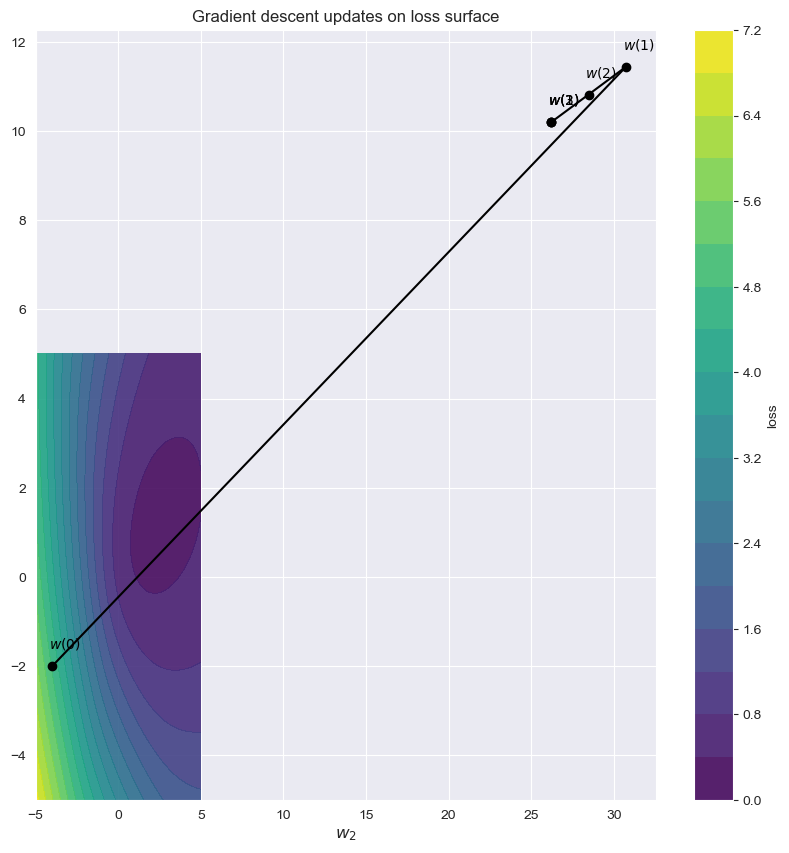

In [67]:
# set the initial weight parameter
w = np.asmatrix([-4, -2])  # randomly decided
# set the learning rate
learning_rate = 0.9

# start the gradient descent updates and plot the iterations
nb_of_iterations = 10 # number of gradient descent updates
w_iter = [w] # list to store the weight values over the iterations
for i in range(nb_of_iterations):
    dw = delta_w(w, X, t, learning_rate) # get the delta w update
    w = w - dw # update the weights
    w_iter.append(w) # store the weights for plotting

# plot the first weight updates on the eror surface
# plot the error surface
plt.figure(figsize=(10, 10))
plt.contourf(ws_x, ws_y, loss_ws, 20, alpha=0.9, cmap=cm.viridis)
cbar = plt.colorbar()
cbar.ax.set_ylabel('loss')

# plot the updates
for i in range(1, 4):
    w1 = w_iter[i-1]
    w2 = w_iter[i]
    # plot thje weight-loss values that represents the update
    plt.plot(w1[0,0], w1[0,1], 'ko') # plot the weight-loss value
    plt.plot([w1[0,0], w2[0,0]], [w1[0,1], w2[0,1]], 'k-')
    plt.text(w1[0,0]-0.2, w1[0,1]+0.4, f'$w({i-1})$', color='k')

    # plot the last weight
    w1 = w_iter[3]
    plt.plot(w1[0,0], w1[0,1], 'ko')
    plt.text(w1[0,0]-0.2, w1[0,1]+0.4, f'$w({i})$', color='k')
# show figure
plt.xlabel('$w_1$', fontsize=12)
plt.xlabel('$w_2$', fontsize=12)
plt.title('Gradient descent updates on loss surface')
plt.show()

/var/folders/jt/tty5vz7x055ff2wqz3c5z_mc0000gn/T/ipykernel_2669/1453038283.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  classification_plane[i,j] = nn_predict(


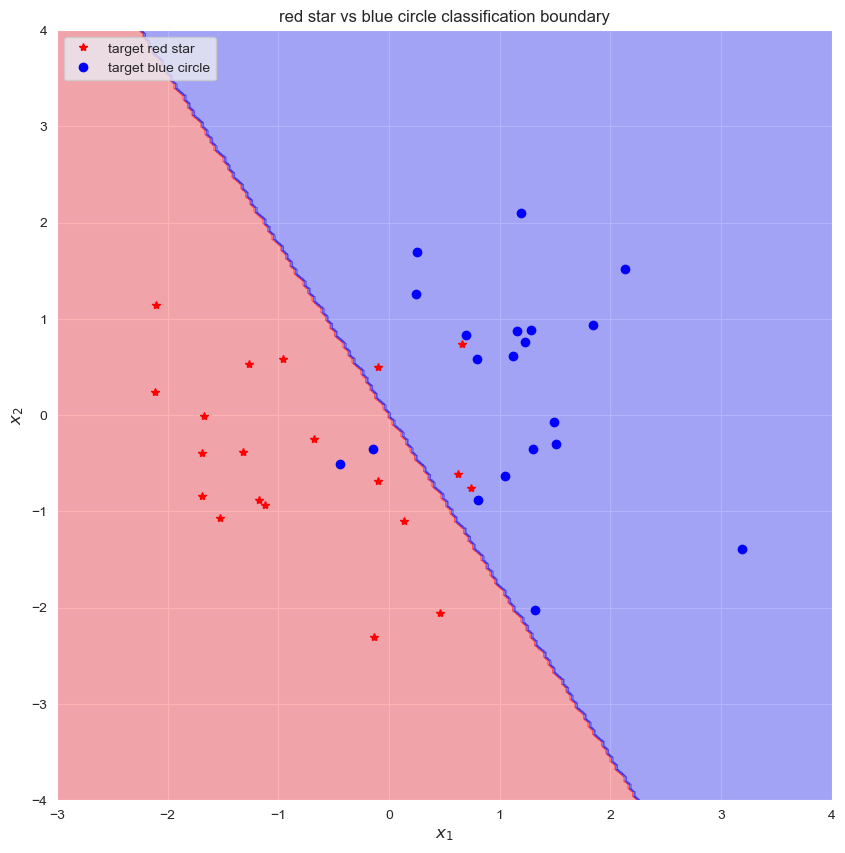

In [68]:
# plot the resulting decision boundary
plt.figure(figsize=(10,10))
# generate a grid over the input space to plot the color of the
# classification at that grid point
nb_of_xs = 200
xsa = np.linspace(-4, 4, num=nb_of_xs)
xsb = np.linspace(-4, 4, num=nb_of_xs)
xx, yy = np.meshgrid(xsa, xsb) # generate the grid
# initialize and fill the classification plane
classification_plane = np.zeros((nb_of_xs, nb_of_xs))

for i in range(nb_of_xs):
    for j in range(nb_of_xs):
        classification_plane[i,j] = nn_predict(
            np.asmatrix([xx[i,j], yy[i,j]]), w
        )
# create o color map to show the classification space
cmap = ListedColormap([
        colorConverter.to_rgba('r', alpha=0.3),
        colorConverter.to_rgba('b', alpha=0.3),
    ])

# plot the classification plane with decision boundary and input samples
plt.contourf(xx, yy, classification_plane, cmap=cmap)
plt.plot(x_red[:,0], x_red[:,1], 'r*', label='target red star')
plt.plot(x_blue[:,0], x_blue[:,1], 'bo', label='target blue circle')
plt.legend(loc=2)
plt.xlabel('$x_1$', fontsize=12)
plt.ylabel('$x_2$', fontsize=12)
plt.title('red star vs blue circle classification boundary')
plt.axis([-3, 4, -4, 4])
plt.show()

### Change learning rate and number of iterations to: learning_rate = 0.001| nb_of_iterations = 100

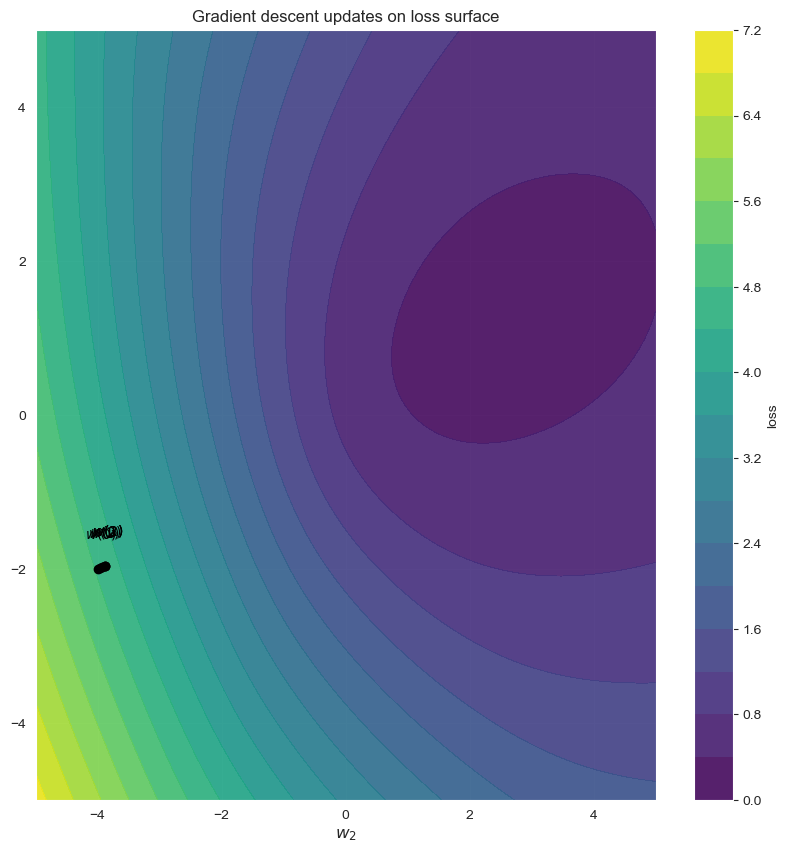

In [69]:
# set the initial weight parameter
w = np.asmatrix([-4, -2])  # randomly decided
# set the learning rate
learning_rate = 0.001

# start the gradient descent updates and plot the iterations
nb_of_iterations = 100 # number of gradient descent updates
w_iter = [w] # list to store the weight values over the iterations
for i in range(nb_of_iterations):
    dw = delta_w(w, X, t, learning_rate) # get the delta w update
    w = w - dw # update the weights
    w_iter.append(w) # store the weights for plotting

# plot the first weight updates on the eror surface
# plot the error surface
plt.figure(figsize=(10, 10))
plt.contourf(ws_x, ws_y, loss_ws, 20, alpha=0.9, cmap=cm.viridis)
cbar = plt.colorbar()
cbar.ax.set_ylabel('loss')

# plot the updates
for i in range(1, 4):
    w1 = w_iter[i-1]
    w2 = w_iter[i]
    # plot thje weight-loss values that represents the update
    plt.plot(w1[0,0], w1[0,1], 'ko') # plot the weight-loss value
    plt.plot([w1[0,0], w2[0,0]], [w1[0,1], w2[0,1]], 'k-')
    plt.text(w1[0,0]-0.2, w1[0,1]+0.4, f'$w({i-1})$', color='k')

    # plot the last weight
    w1 = w_iter[3]
    plt.plot(w1[0,0], w1[0,1], 'ko')
    plt.text(w1[0,0]-0.2, w1[0,1]+0.4, f'$w({i})$', color='k')
# show figure
plt.xlabel('$w_1$', fontsize=12)
plt.xlabel('$w_2$', fontsize=12)
plt.title('Gradient descent updates on loss surface')
plt.show()

/var/folders/jt/tty5vz7x055ff2wqz3c5z_mc0000gn/T/ipykernel_2669/1453038283.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  classification_plane[i,j] = nn_predict(


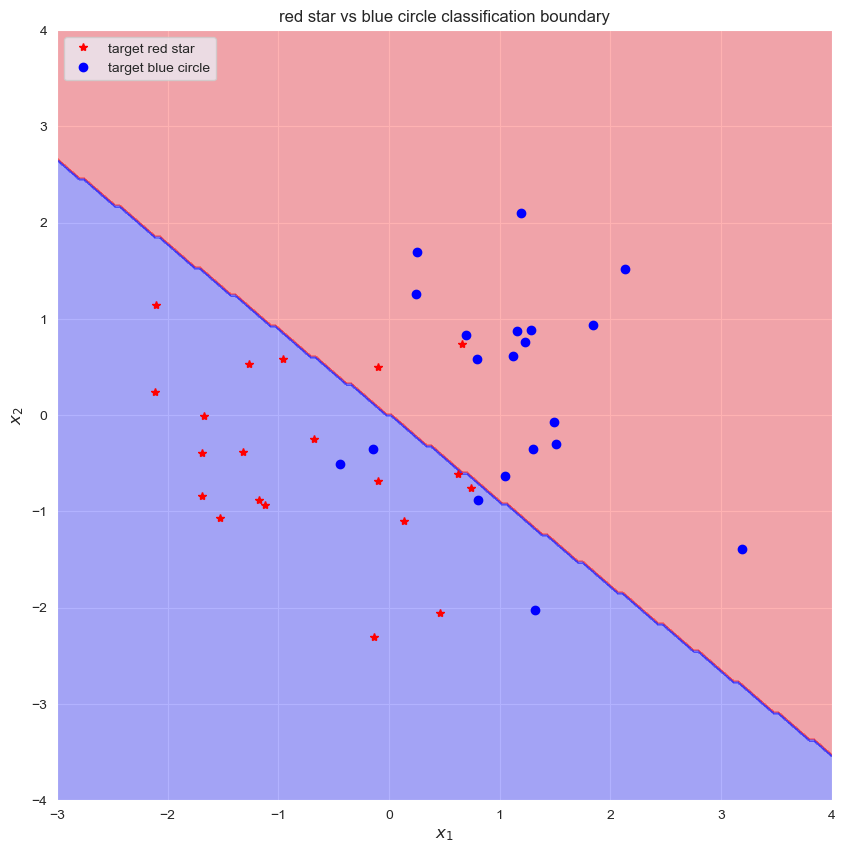

In [70]:
# plot the resulting decision boundary
plt.figure(figsize=(10,10))
# generate a grid over the input space to plot the color of the
# classification at that grid point
nb_of_xs = 200
xsa = np.linspace(-4, 4, num=nb_of_xs)
xsb = np.linspace(-4, 4, num=nb_of_xs)
xx, yy = np.meshgrid(xsa, xsb) # generate the grid
# initialize and fill the classification plane
classification_plane = np.zeros((nb_of_xs, nb_of_xs))

for i in range(nb_of_xs):
    for j in range(nb_of_xs):
        classification_plane[i,j] = nn_predict(
            np.asmatrix([xx[i,j], yy[i,j]]), w
        )
# create o color map to show the classification space
cmap = ListedColormap([
        colorConverter.to_rgba('r', alpha=0.3),
        colorConverter.to_rgba('b', alpha=0.3),
    ])

# plot the classification plane with decision boundary and input samples
plt.contourf(xx, yy, classification_plane, cmap=cmap)
plt.plot(x_red[:,0], x_red[:,1], 'r*', label='target red star')
plt.plot(x_blue[:,0], x_blue[:,1], 'bo', label='target blue circle')
plt.legend(loc=2)
plt.xlabel('$x_1$', fontsize=12)
plt.ylabel('$x_2$', fontsize=12)
plt.title('red star vs blue circle classification boundary')
plt.axis([-3, 4, -4, 4])
plt.show()